In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
import pandas as pd
import re
import scikitplot as skplt
import seaborn as sns

/Users/aleksandraivanova/anaconda3/envs/i2dl/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
def get_counts_vector(labels_vector):
    unique_labels, label_counts = np.unique(labels_vector, return_counts=True)
    counts_vector = np.zeros(21, dtype=int)
    counts_vector[unique_labels] = label_counts
    return counts_vector, unique_labels

sc_class_labels= ['eosinophil granulocyte', 'reactive lymphocyte',
       'neutrophil granulocyte (segmented)', 'typical lymphocyte',
       'other', 'neutrophil granulocyte (band)', 'monocyte',
       'large granulated lymphocyte', 'atypical promyelocyte',
       'basophil granulocyte', 'smudge cell', 'neoplastic lymphocyte',
       'promyelocyte', 'myelocyte', 'myeloblast', 'metamyelocyte',
       'normo', 'plasma cell', 'hair cell', 'bilobed M3v',
       'mononucleosis']

aml_class_labels = ["CBFB_MYH11","control","NPM1","PML_RARA","RUNX1_RUNX1T1"]

# Path to the folder containing your files
data_path = '../../data'
result_path = '../../data/output'

../../data/CBFB_MYH11/POM/single_cell_probabilities.npy
../../data/CBFB_MYH11/XIE/single_cell_probabilities.npy
../../data/CBFB_MYH11/DQV/single_cell_probabilities.npy
../../data/CBFB_MYH11/ZEE/single_cell_probabilities.npy
../../data/CBFB_MYH11/BTB/single_cell_probabilities.npy
../../data/CBFB_MYH11/FOL/single_cell_probabilities.npy
../../data/CBFB_MYH11/NCD/single_cell_probabilities.npy
../../data/CBFB_MYH11/OUR/single_cell_probabilities.npy
../../data/CBFB_MYH11/HFM/single_cell_probabilities.npy
../../data/CBFB_MYH11/SBY/single_cell_probabilities.npy
../../data/CBFB_MYH11/ZVS/single_cell_probabilities.npy
../../data/CBFB_MYH11/VDQ/single_cell_probabilities.npy
../../data/CBFB_MYH11/OEY/single_cell_probabilities.npy
../../data/CBFB_MYH11/KOV/single_cell_probabilities.npy
../../data/CBFB_MYH11/YXH/single_cell_probabilities.npy
../../data/CBFB_MYH11/IEN/single_cell_probabilities.npy
../../data/CBFB_MYH11/GOR/single_cell_probabilities.npy
../../data/CBFB_MYH11/DSN/single_cell_probabilit

/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_30108/1062945477.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', len(unique_labels))
/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_30108/1062945477.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')


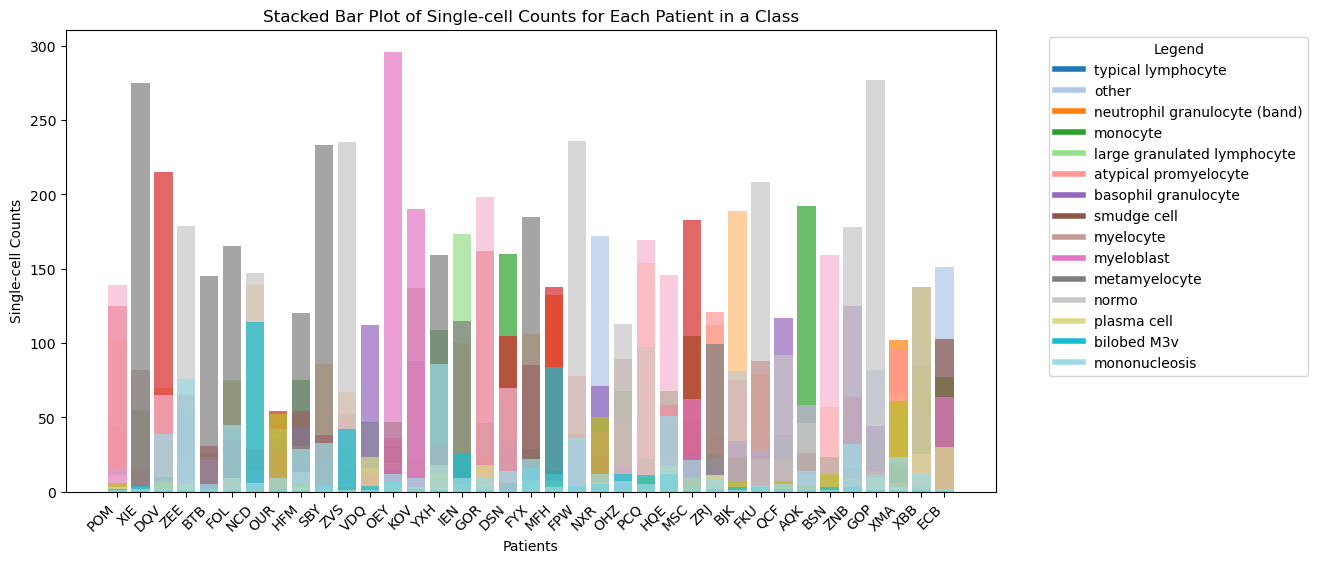

In [7]:
# Path to the folder containing your files
class_path = '../../data/CBFB_MYH11'

# Initialize lists to store data for plotting
patient_folder_names = []
stacked_counts_vectors = []

# Iterate over all files in the folder
for patient_folder in os.listdir(class_path):

    if(len(patient_folder)==3):
    
        probs_path = os.path.join(class_path, patient_folder) + '/single_cell_probabilities.npy'

        print(probs_path)
        sc_probs = np.load(probs_path)
        sc_class= np.argmax(sc_probs, axis=1)
        counts_vector,unique_labels = get_counts_vector(sc_class)

        # Create a custom color list for each position
        cmap = get_cmap('tab20', len(unique_labels))
        colors = [cmap(i) for i in range(len(unique_labels))]
        
        # Append data for plotting
        patient_folder_names.append(patient_folder)
        stacked_counts_vectors.append((counts_vector, unique_labels, colors))

cmap = get_cmap('tab20')

# Create a stacked bar plot for each file
fig, ax = plt.subplots(figsize=(12, 6)) 
for i, (counts_vector, unique_labels, colors) in enumerate(stacked_counts_vectors):
    ax.bar(patient_folder_names[i], counts_vector[unique_labels], label=f"File {i + 1}", alpha=0.7, color=colors)

# Create a legend showing which color corresponds to which class label
legend_elements = [Line2D([0], [0], color=color, lw=4, label=sc_class_labels[label]) for label, color in zip(unique_labels, colors)]
ax.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and legend
ax.set_xlabel("Patients")
ax.set_ylabel("Single-cell Counts")
ax.set_title("Stacked Bar Plot of Single-cell Counts for Each Patient in a Class")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [8]:

probs_path = '../../data/CBFB_MYH11/AQK/single_cell_probabilities.npy'
print(probs_path)
sc_probs = np.load(probs_path)
sc_class= np.argmax(sc_probs, axis=1)
counts_vector,unique_labels = get_counts_vector(sc_class)
counts_vector

../../data/CBFB_MYH11/AQK/single_cell_probabilities.npy


array([  1,  18,  32, 192,  13,   1,  58,  26,  12,   0,   2,   0,   0,
         0,  46,   0,   0,   4,   1,   0,  14])

## Calculate Single Cell Classification counts 

In [9]:
def get_patient_name(path):
    return re.search(r"/data/\w+/([A-Z]{3})", path).group(1)

def get_class_name(path):
    return re.search(r"/data/(\w+)", path).group(1)

def get_classification_patient(patient_folder):
    probs_path = patient_folder + '/single_cell_probabilities.npy'
    sc_probs = np.load(probs_path)
    sc_class= np.argmax(sc_probs, axis=1)
    return sc_class

In [10]:
df = pd.DataFrame(columns=["patient","AML_subtype"]+sc_class_labels)
# Save class classification count for each patient in csv file
for folder_class in os.listdir(data_path):
    folder_class = os.path.join(data_path, folder_class)
    
    if os.path.isdir(folder_class):
       print(folder_class)
       for folder_patient in os.listdir(folder_class):
            folder_patient = os.path.join(folder_class, folder_patient)
            
            if os.path.isdir(folder_patient):
                if "single_cell_probabilities.npy" not in os.listdir(folder_patient):
                    print("Skipping patient folder without single_cell_probabilities.npy:", folder_patient)
                    continue
                sc_class = get_classification_patient(folder_patient)
                counts_vector,unique_labels = get_counts_vector(sc_class)
                df.loc[len(df)]=np.array([get_patient_name(folder_patient),get_class_name(folder_patient)]+counts_vector.tolist())

../../data/NPM1
../../data/CBFB_MYH11
../../data/PML_RARA
../../data/control
../../data/RUNX1_RUNX1T1


In [11]:
df[sc_class_labels]=df[sc_class_labels].astype(int)
df[["patient","AML_subtype"]]=df[["patient","AML_subtype"]].astype(str)

In [13]:
# make sure you have created the output folder in data
df.to_csv(result_path+"/single_cell_results.csv")

In [14]:
df = pd.read_csv(result_path+"/single_cell_results.csv",index_col = 0)

## Create plots with single cell classification counts

In [23]:
# Calculate the mean and std across all columns except 'patient'
numeric_columns = df.select_dtypes(include=['number']).columns

df_meanstd = df.groupby(["AML_subtype"])[numeric_columns].agg(["mean","std"])
df_meanstd

eosinophil granulocyte           reactive lymphocyte             \
                                mean       std                mean        std   
AML_subtype                                                                     
CBFB_MYH11                  3.189189  4.047206            4.567568   5.545471   
NPM1                        1.944444  2.551688            4.027778   5.789084   
PML_RARA                    0.958333  1.458980            2.916667   4.169419   
RUNX1_RUNX1T1               0.937500  1.242721            4.062500   4.420900   
control                     9.000000  7.936186           12.766667  15.076490   

              neutrophil granulocyte (segmented)             \
                                            mean        std   
AML_subtype                                                   
CBFB_MYH11                             10.783784  18.291065   
NPM1                                   27.055556  34.805537   
PML_RARA                               22.625000  28.985472   
RUNX1_RUNX1T1                          31.531250  35.020717   
control                               150.933333  80.210711   

              typical lymphocyte                 other             ...  \
                            mean        std       mean        std  ...   
AML_subtype                                                        ...   
CBFB_MYH11             63.189189  51.278021  51.216216  40.280361  ...   
NPM1                   51.305556  46.844313  70.638889  47.419196  ...   
PML_RARA               58.083333  81.112330  74.833333  35.811908  ...   
RUNX1_RUNX1T1          86.468750  54.053727  33.750000  21.722591  ...   
control                58.900000  35.480575  48.350000  33.008384  ...   

                  normo            plasma cell            hair cell            \
                   mean        std        mean        std      mean       std   
AML_subtype                                                                     
CBFB_MYH11     1.918919   2.575293   12.243243  23.329054  1.459459  3.123340   
NPM1           8.000000  23.615975   16.277778  32.815163  5.138889  5.904733   
PML_RARA       7.250000   9.260716    4.333333   4.631336  2.583333  3.425184   
RUNX1_RUNX1T1  2.656250   3.054445    7.093750   7.158840  1.531250  2.228617   
control        0.616667   1.249972    2.583333   4.716691  0.916667  1.417705   

              bilobed M3v            mononucleosis             
                     mean        std          mean        std  
AML_subtype                                                    
CBFB_MYH11       4.027027   8.513018     17.405405  20.575686  
NPM1             1.055556   1.984863     10.805556  12.240027  
PML_RARA        14.750000  44.226935      3.416667   4.272426  
RUNX1_RUNX1T1   10.687500  16.662567      8.625000   8.903606  
control          0.000000   0.000000      5.283333   5.865994  

[5 rows x 42 columns]

### Plot mean and standard deviation for all AML subtypes

/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_30108/3896974255.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)
/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_30108/3896974255.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.7}` instead.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)


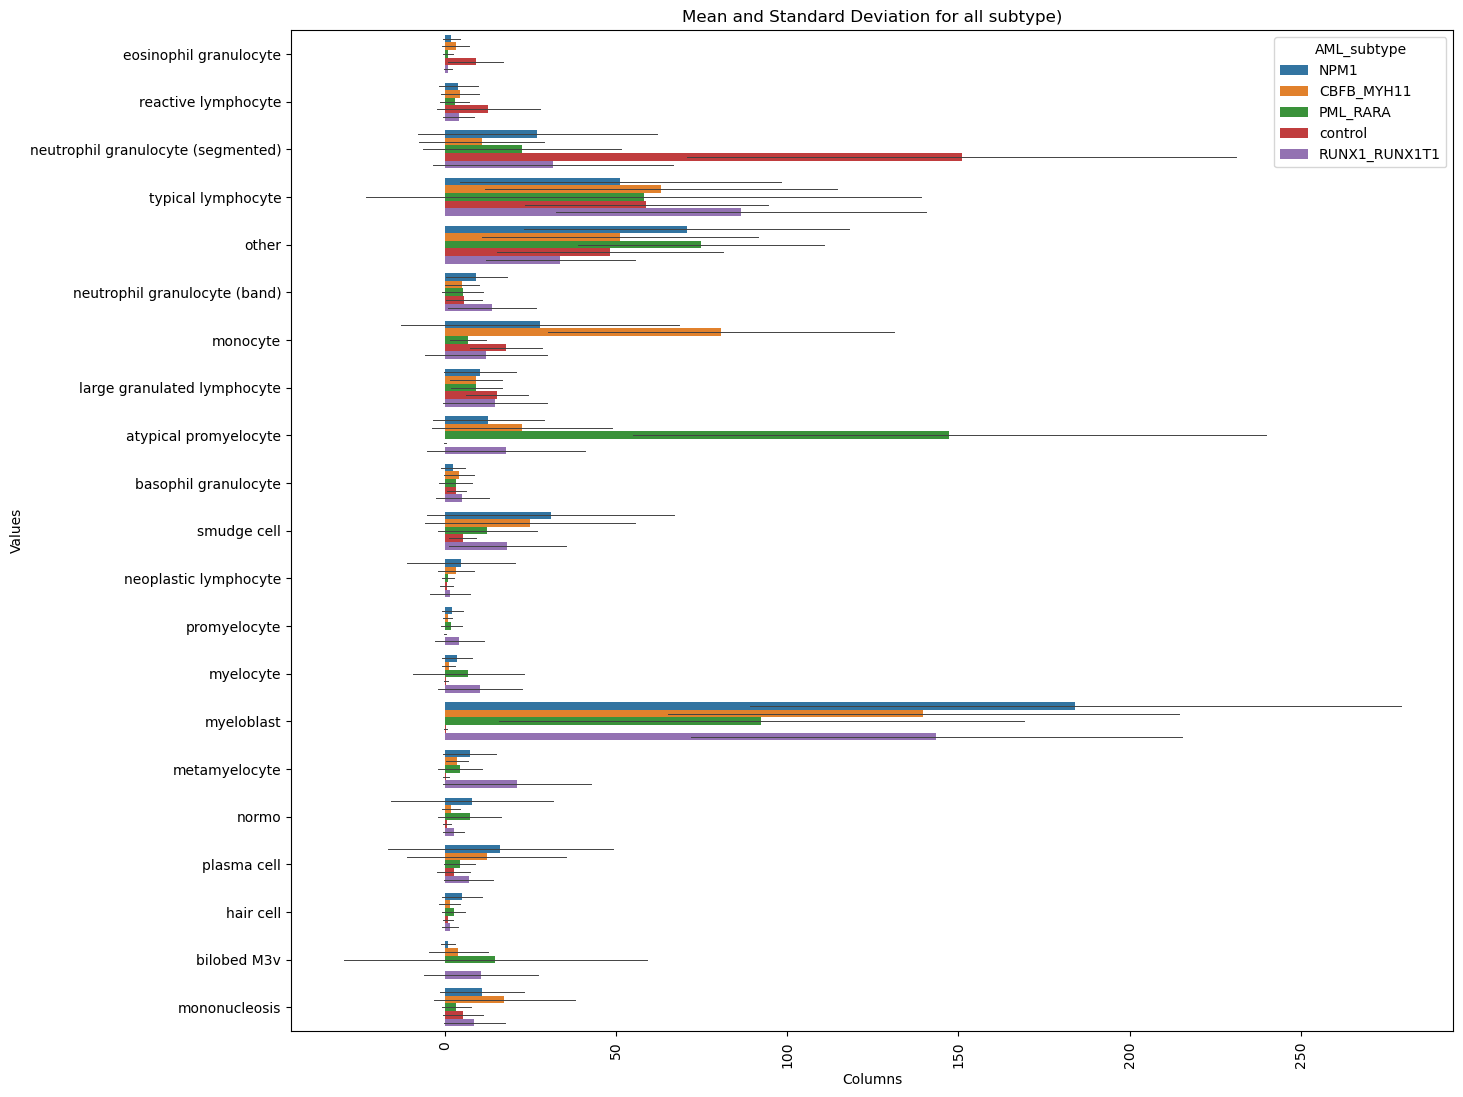

In [24]:
# Melt DataFrame to have a column for variable names
aml_class="NPM1"
mask = df["AML_subtype"]==aml_class
melted_df = pd.melt(df, id_vars=["AML_subtype"], value_vars=df.columns[1:])

# Plotting using seaborn
plt.figure(figsize=(15, 13))
sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)

# Set plot labels and title
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title(f"Mean and Standard Deviation for all subtype)")
plt.xticks(rotation=90)

# Show the plot
plt.show()


### Plot mean and standard deviation for each AML subtype individually

In [25]:
print(sns.color_palette().as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_30108/3598854298.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)
/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_30108/3598854298.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.7}` instead.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)


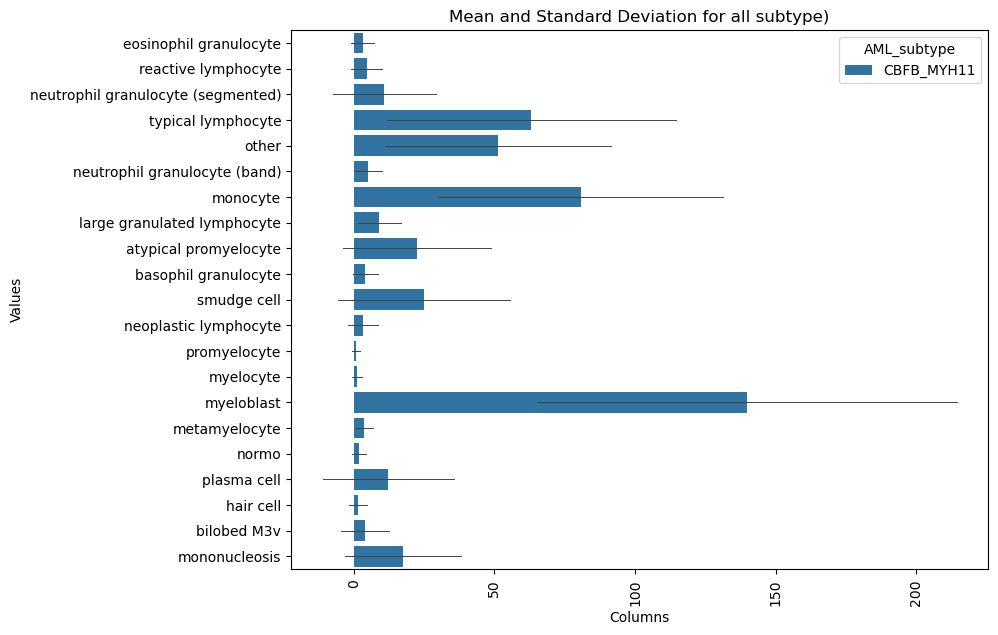

/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_30108/3598854298.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)
/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_30108/3598854298.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.7}` instead.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)


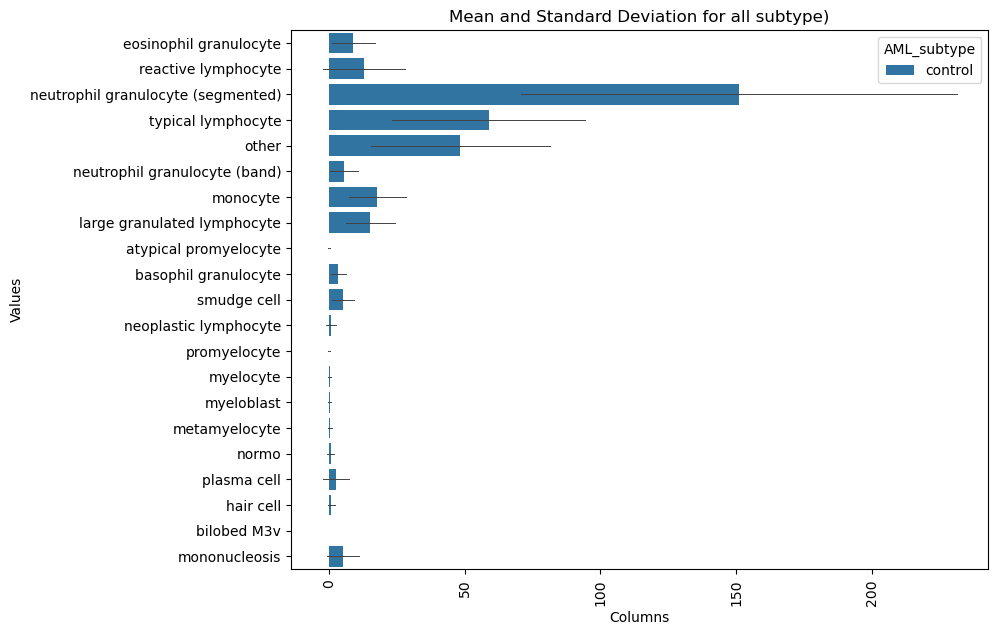

/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_30108/3598854298.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)
/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_30108/3598854298.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.7}` instead.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)


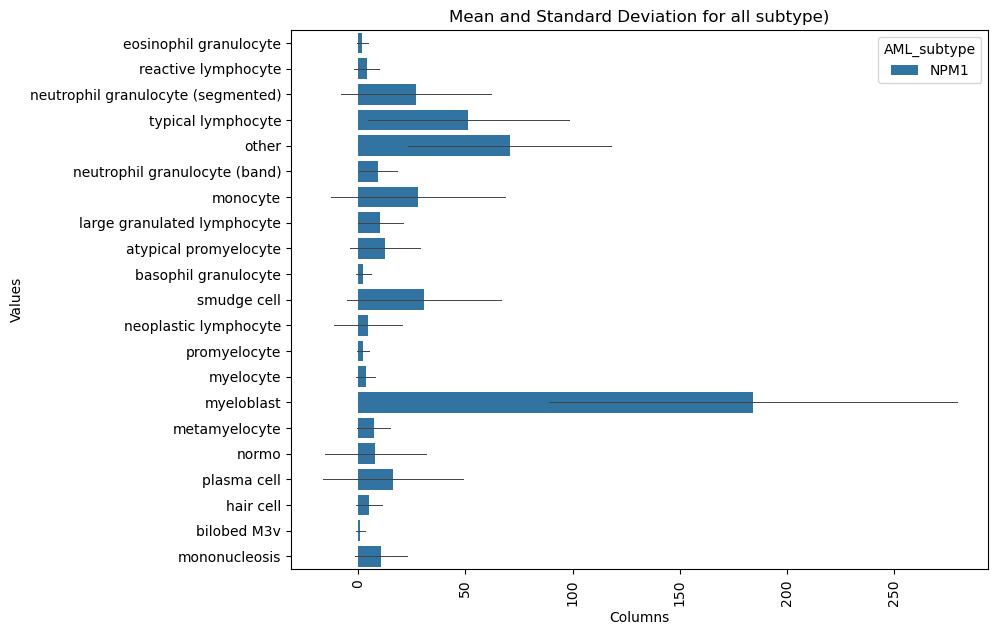

/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_30108/3598854298.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)
/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_30108/3598854298.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.7}` instead.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)


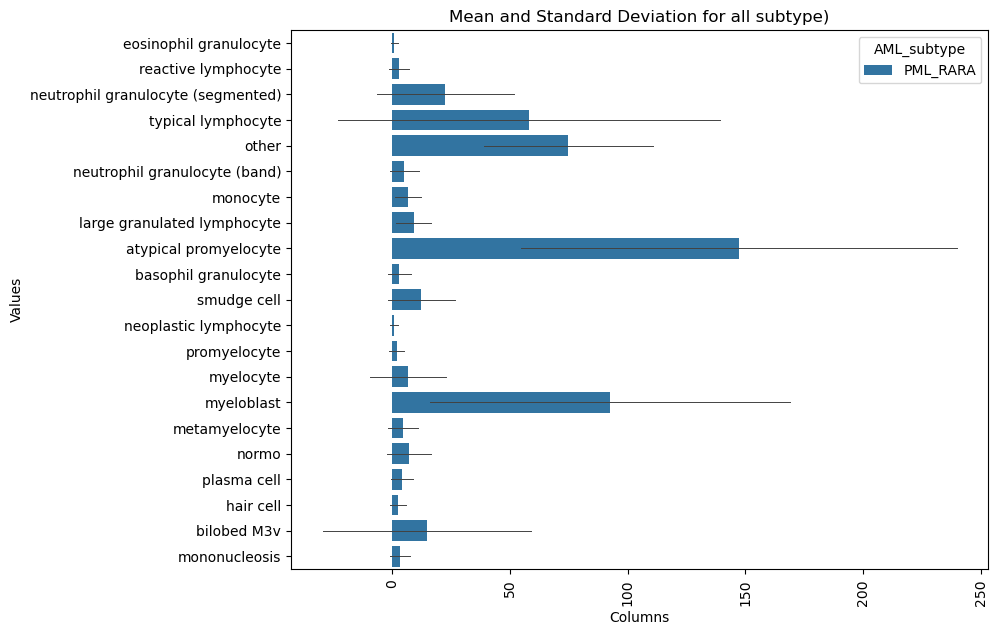

/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_30108/3598854298.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)
/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_30108/3598854298.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.7}` instead.

  sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)


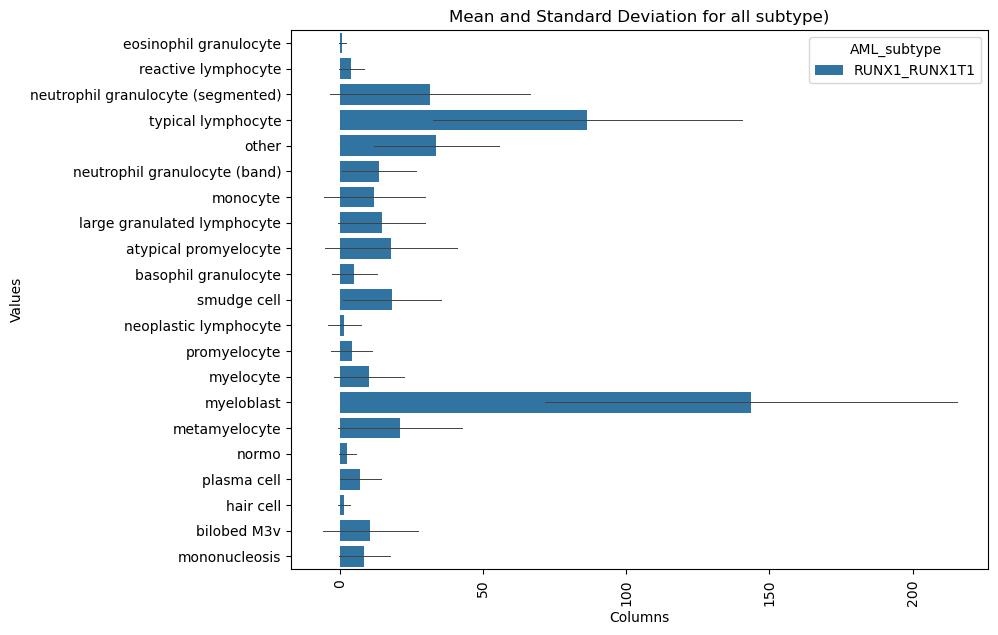

In [26]:
# Melt DataFrame to have a column for variable names
for i,aml_class in enumerate(aml_class_labels):
    mask = df["AML_subtype"]==aml_class
    melted_df = pd.melt(df[mask], id_vars=["AML_subtype"], value_vars=df.columns[1:])

    # Plotting using seaborn
    plt.figure(figsize=(9, 7))
    sns.barplot(x="value", y="variable", hue="AML_subtype", data=melted_df, ci="sd",orient='h', errwidth=0.7)

    # Set plot labels and title
    plt.xlabel("Columns")
    plt.ylabel("Values")
    plt.title(f"Mean and Standard Deviation for all subtype)")
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()


In [33]:
# Read metadata from the CSV file
metadata = pd.read_csv('../../metadata.csv')

# Filter data for the specific class
class_data = metadata[metadata['bag_label'] == 'NPM1']
#print(class_data)

# Extract percentage columns from the 6th column to the second-to-last column
percentages_columns = class_data.iloc[:, 5:-1]

# Initialize a list to store real patients' data
real_patients_data_for_class = []

# Iterate over each patient in the class
for index, patient_info in class_data.iterrows():
    # Extract relevant information
    instance_count = patient_info['instance_count']
    print(instance_count)
    percentages = percentages_columns.loc[index].values

    # Check for NaN values in percentages and replace them with np.nan
    percentages = np.where(np.isnan(percentages), np.nan, percentages)

    # Calculate counts for each cell type based on percentages
    cell_type_counts = (percentages / 100) * instance_count

    # Create a dictionary representing the real patient data
    real_patient_data = {
        f'cell_type_{i+1}': int(np.round(cell_type_counts[i])) if not np.isnan(cell_type_counts[i]) else np.nan
        for i in range(len(percentages))
    }

    # Add the patient data to the list
    real_patients_data_for_class.append(real_patient_data)

494
488
498
492
494
492
500
489
493
490
500
489
496
489
466
496
495
489
486
498
498
480
499
487
487
498
497
494
489
495
497
483
498
483
494
497


In [38]:
def create_data_per_class(bag_label, metadata_file='../../metadata.csv'):
    # Read metadata from the CSV file
    metadata = pd.read_csv(metadata_file)

    # Filter data for the specific class
    class_data = metadata[metadata['bag_label'] == bag_label]

    # Extract percentage columns from the 6th column to the second-to-last column
    percentages_columns = class_data.iloc[:, 5:-1]

    # Initialize a list to store real patients' data
    real_patients_data_for_class = []

    # Iterate over each patient in the class
    for index, patient_info in class_data.iterrows():
        # Extract relevant information
        instance_count = patient_info['instance_count']
        percentages = percentages_columns.loc[index].values

        # Check for NaN values in percentages and replace them with np.nan
        percentages = np.where(np.isnan(percentages), np.nan, percentages)

        # Calculate counts for each cell type based on percentages
        cell_type_counts = (percentages / 100) * instance_count

        # Create a dictionary representing the real patient data
        real_patient_data = {
            f'cell_type_{i+1}': int(np.round(cell_type_counts[i])) if not np.isnan(cell_type_counts[i]) else np.nan
            for i in range(len(percentages))
        }
        
        # Add the patient data to the list
        real_patients_data_for_class.append(real_patient_data)

    return real_patients_data_for_class

# Example usage:
bag_label_to_generate = 'NPM1'
real_data_for_class = create_data_per_class(bag_label_to_generate)
print(f'Real patients\' data for class {bag_label_to_generate}:')
print(real_data_for_class)


Real patients' data for class NPM1:
[{'cell_type_1': 68, 'cell_type_2': 420, 'cell_type_3': 0, 'cell_type_4': 5, 'cell_type_5': 0, 'cell_type_6': 5, 'cell_type_7': 20, 'cell_type_8': 0, 'cell_type_9': 0, 'cell_type_10': 15, 'cell_type_11': 30, 'cell_type_12': 0, 'cell_type_13': 0, 'cell_type_14': 0}, {'cell_type_1': 146, 'cell_type_2': 400, 'cell_type_3': 0, 'cell_type_4': 0, 'cell_type_5': 0, 'cell_type_6': 0, 'cell_type_7': 5, 'cell_type_8': 10, 'cell_type_9': 0, 'cell_type_10': 34, 'cell_type_11': 39, 'cell_type_12': 0, 'cell_type_13': 0, 'cell_type_14': 0}, {'cell_type_1': 831, 'cell_type_2': 398, 'cell_type_3': 0, 'cell_type_4': 0, 'cell_type_5': 0, 'cell_type_6': 0, 'cell_type_7': 5, 'cell_type_8': 0, 'cell_type_9': 0, 'cell_type_10': 70, 'cell_type_11': 25, 'cell_type_12': 0, 'cell_type_13': 0, 'cell_type_14': 0}, {'cell_type_1': 10, 'cell_type_2': 108, 'cell_type_3': 5, 'cell_type_4': 0, 'cell_type_5': 0, 'cell_type_6': 0, 'cell_type_7': 226, 'cell_type_8': 0, 'cell_type_9': 0,

In [45]:
from sklearn.mixture import GaussianMixture

# Set OPENBLAS_CORETYPE environment variable
os.environ["OPENBLAS_CORETYPE"] = "nehalem"

# Number of synthetic patients to generate
num_synthetic_patients = 2

# Initialize a dictionary to store synthetic patients
synthetic_patients = {}

# Generate synthetic patients for each class
for class_label in df_meanstd.index:
    means = df_meanstd.loc[class_label].values
    stds = df_meanstd.loc[class_label].values

    real_data_for_class = create_data_per_class(class_label)
    
    # Replace NaN values with 0 in the real_data_for_class
    real_data_for_class = [{key: 0 if np.isnan(value) else value for key, value in patient.items()} for patient in real_data_for_class]

    real_data_array = np.array([list(patient.values()) for patient in real_data_for_class])
    # Fit a GMM to the real patients' data
    gmm = GaussianMixture(n_components=3, init_params='random', covariance_type='diag')  # Adjust the number of components
    gmm.fit(real_data_array) 

    # Generate synthetic patients
    synthetic_patients[class_label] = []
    for _ in range(num_synthetic_patients):
        # Sample from the learned GMM
        synthetic_counts = gmm.sample()[0][0]

        # Create a new patient by combining synthetic counts for all cell types
        synthetic_patient = {
            f'cell_type_{i+1}': int(np.clip(np.random.normal(synthetic_counts[i], stds[i]), 0, np.inf))
            for i in range(len(synthetic_counts))
        }
        synthetic_patients[class_label].append(synthetic_patient)

# Now, synthetic_patients contains the generated synthetic patients for each class
print(synthetic_patients)

{'CBFB_MYH11': [{'cell_type_1': 360, 'cell_type_2': 255, 'cell_type_3': 0, 'cell_type_4': 5, 'cell_type_5': 0, 'cell_type_6': 0, 'cell_type_7': 75, 'cell_type_8': 0, 'cell_type_9': 0, 'cell_type_10': 77, 'cell_type_11': 15, 'cell_type_12': 0, 'cell_type_13': 0, 'cell_type_14': 0}, {'cell_type_1': 149, 'cell_type_2': 109, 'cell_type_3': 0, 'cell_type_4': 5, 'cell_type_5': 4, 'cell_type_6': 21, 'cell_type_7': 118, 'cell_type_8': 98, 'cell_type_9': 62, 'cell_type_10': 245, 'cell_type_11': 95, 'cell_type_12': 0, 'cell_type_13': 0, 'cell_type_14': 0}], 'NPM1': [{'cell_type_1': 83, 'cell_type_2': 172, 'cell_type_3': 2, 'cell_type_4': 11, 'cell_type_5': 0, 'cell_type_6': 0, 'cell_type_7': 77, 'cell_type_8': 0, 'cell_type_9': 0, 'cell_type_10': 146, 'cell_type_11': 59, 'cell_type_12': 0, 'cell_type_13': 91, 'cell_type_14': 7}, {'cell_type_1': 685, 'cell_type_2': 244, 'cell_type_3': 0, 'cell_type_4': 22, 'cell_type_5': 14, 'cell_type_6': 0, 'cell_type_7': 93, 'cell_type_8': 0, 'cell_type_9': 52